# A1 - Data cleaning and visualisation
### Martin Hansson

# Question 1

## Reading data set

File *life-expectancy-vs-gdp-per-capita.csv* was downloaded from *ourworldindata.org*. This header of the dataset are shown below.

In [ ]:
import seaborn as sns
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker
import warnings

warnings.filterwarnings('ignore')
# Turn off warnings for chained assignments
pd.options.mode.chained_assignment = None 

data = pd.read_csv("life-expectancy-vs-gdp-per-capita.csv")  #reading data
print(data.head(3))
print(data.columns)

        Entity      Code  Year  Total population (Gapminder, HYDE & UN)  \
0     Abkhazia  OWID_ABK  2015                                      NaN   
1  Afghanistan       AFG  1800                                3280000.0   
2  Afghanistan       AFG  1801                                3280000.0   

  Continent  Life expectancy  \
0      Asia              NaN   
1       NaN              NaN   
2       NaN              NaN   

   Real GDP per capita in 2011US$, multiple benchmarks (Maddison Project Database (2018))  
0                                                NaN                                       
1                                                NaN                                       
2                                                NaN                                       
Index(['Entity', 'Code', 'Year', 'Total population (Gapminder, HYDE & UN)',
       'Continent', 'Life expectancy',
       'Real GDP per capita in 2011US$, multiple benchmarks (Maddison Project Database 

## Data cleaning

The data set consists of 50220 rows and columns and contains data for *GDP/capita, Life Expectancy, Total population, Continent* etc for different countries from year of 1800-2019. The following actions are taken and assumptions made to clean the data set:

1. The name of '*Real GDP per capita...*' and '*Total population (Gapminder, HYDE & UN)*'  column are renamed to '*GDP*' and '*Population*'.
2. Data for year 2015 was selected to visualize *GDP/capita* vs *life expectancy*. Data from all other years are removed. We want to compare life expectancy vs GDP for a single and quite rescent year and it turned out that 2015 had most data points of the last 5 years.
3. Rows with missing data for either *GDP/capita*, *Life expectancy* or *Population* were removed. To visualize a trend between the given variables a few data points are not considered to influence the overall result.
4. A data column for '*GDP*' were added, i.e. *GDP/capita x Population*

In [ ]:
#Data cleaning---------------------------
data.rename(columns={data.columns[6]: 'GDPpc',data.columns[3]: 'Population'}, inplace=True)
data=data[data.Year==2015]
data=data[data['Life expectancy'].notnull() & data['GDPpc'].notnull() & data['Continent'].notnull()& data['Population'].notnull() ]
data['GDP']=data['Population']*data['GDPpc']
print(data.head())



           Entity Code  Year  Population      Continent  Life expectancy  \
216   Afghanistan  AFG  2015  34414000.0           Asia           63.377   
560       Albania  ALB  2015   2891000.0         Europe           78.025   
780       Algeria  DZA  2015  39728000.0         Africa           76.090   
1366       Angola  AGO  2015  27884000.0         Africa           59.398   
1877    Argentina  ARG  2015  43075000.0  South America           76.068   

        GDPpc           GDP  
216    1928.0  6.635019e+10  
560   10947.0  3.164778e+10  
780   13024.0  5.174175e+11  
1366   8631.0  2.406668e+11  
1877  19316.0  8.320367e+11  


## 1a - Scatter plot Life Expectancy vs GDP per capita
It seems reasonable to believe that _Life expectancy_ are dependent on _GDP per capita_ and not the other way around. Therefore y-axis are represented by _Life expectancy_ and x-axis are represented by _GDP per capita_.
Data for year 2015 was selected to visualize *GDP/capita* vs *life expectancy*. We want to compare life expectancy vs GDP for a single and quite rescent year and it turned out that 2015 had most data points of the last 5 years.
The data points were color coded by continent, to see if any possible differences.

In [ ]:
%matplotlib inline

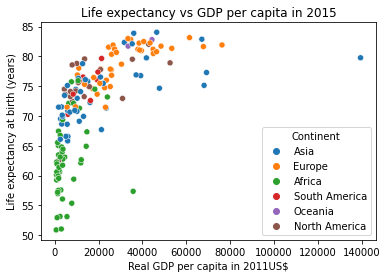

In [ ]:

plt.figure(4)
sns.scatterplot(x=data['GDPpc'],y=data['Life expectancy'],hue=data['Continent'])
plt.title('Life expectancy vs GDP per capita in 2015')
plt.xlabel('Real GDP per capita in 2011US$')
plt.ylabel('Life expectancy at birth (years)')
plt.show()

## 1b - Analysis of scatter plot results
The graph shows that life expectancy at birth, increases at a decreasing rate with respect to GDP per capita. It looks like there are none or small dependency 
for GDP per capita above 30000 US$. The main reason for this could be that people consume both needs and wants. Once the needs (e.g. food, health care, 
accommodation etc.) are fulfilled people spend money on wants, which will not affect life expectancy. If everyone needs are satisfied, then an increase in 
GDP per capita would barely increase life expectancy. The reason for wide spread in life expectancy for low GDP could be the level of non-market economic activity. For example if farmers are self-sufficient, i.e. they are eating their own food, they might fulfill their needs without contributing to GDP. Political system is another factor that would influence the life expectancy. For instance, the amount of money spent on health care, tax system and the degree of inequality in society. 

It can also be noticed that Asia and Europe have higher life expactancy, even with the GDP/capita taken into account while Africa has the lowest.

## 1c - Data cleaning
See Data Cleaning section above

## 1d - Countries with life expectancy above one standard deviation
The countries with a life expectancy higher than one standard deviation are listed in the table below. It can be noticed that all countries are located in Europe, Asia or North America.

In [ ]:
err_life=np.sqrt(np.var(data['Life expectancy']))
mean_life=np.mean(data['Life expectancy'])
A=data[data['Life expectancy']>mean_life+err_life]
A.Entity


2510          Australia
2730            Austria
4280            Belgium
7572             Canada
10720            Cyprus
11475           Denmark
14540           Finland
15493            France
16519           Germany
17030            Greece
19005         Hong Kong
19445           Iceland
20554           Ireland
20845            Israel
21075             Italy
21523             Japan
25063        Luxembourg
26673             Malta
30613       Netherlands
30904       New Zealand
32338            Norway
35546          Portugal
39491         Singapore
40001          Slovenia
40977       South Korea
41428             Spain
43029            Sweden
43250       Switzerland
47277    United Kingdom
Name: Entity, dtype: object

## 1e - Countries with high life expectancy and low GDP
First it needs to be determined how to define *high life expactancy* and *low GDP* respectively. Either *mean + (or-) factor x standard deviation* could be used or some appropriate percentile. To determine the best choice we can look at histograms of the data to see the distribution.

In the figure below the distribution for normalized data is plotted. It shows that the distribution for both *GDP* and *Life expectancy* are skewed. Then it would be a better option to use the the percentiles to define *low GDP* and *high Life expectancy*.

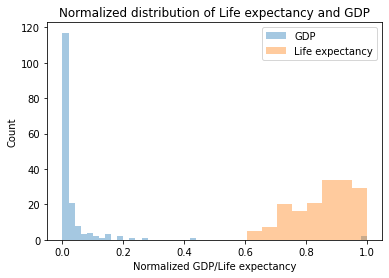

In [ ]:
plt.figure(5)
sns.distplot(data.GDP/data.GDP.max(),label="GDP", kde=False)
sns.distplot(data['Life expectancy']/data['Life expectancy'].max(),label="Life expectancy", kde=False)
plt.xlabel('Normalized GDP/Life expectancy')
plt.ylabel('Count')
plt.title("Normalized distribution of Life expectancy and GDP")
plt.legend()
plt.show()



We define that countries with high life expectancy should have a life expectancy higher than Q3 (upper quartile) and a country with low GDP should have GDP lower than Q1 (lower quartile). Then we end up with the countries listed in the table below.

As expected all countries listed are countries with small population which have low GDP but high GDP per capita.

In [ ]:
Q3_life=np.quantile(data['Life expectancy'],0.75)
Q1_GDP=np.quantile(data['GDP'],0.25)
B=data[(data['Life expectancy']>Q3_life) & (data['GDP']<Q1_GDP)]
B[['Entity','Population']]

,Entity,Population
3832,Barbados,285000.0
10720,Cyprus,1161000.0
19445,Iceland,330000.0
26673,Malta,434000.0


## 1f - Does every strong economy (based on GDP) have high life expectancy?
If we define *strong economy* and *high life expectancy* similar to Question 1e using the upper quartile, countries with strong economy and low life expectancy will most likely be found since there will be some variations around the limits, i.e. they will not be ordered in the exactly the same way even is the correlation is almost perfect. Instead, to check if every strong economy has high life expectancy the following must be fulfilled:

GDP > Q3 (GDP) - This is defining the strong economies

Life Expectancy > Q2 (Life expectancy) - The country have a Life Expectancy above median

13 countries did *not* fulfill these criterias are listed in the table below. This is countries with high populations and low GDP per capita. The answer is NO! 

In [ ]:
Q3_GDP=np.quantile(data['GDP'],0.75)
Q2_life=np.quantile(data['Life expectancy'],0.5)
C=data[(data['Life expectancy']<Q2_life) & (data['GDP']>Q3_GDP)]
C[['Entity','Population']]


,Entity,Population
3612,Bangladesh,1.562560e+08
12727,Egypt,9.244300e+07
19669,India,1.310152e+09
19889,Indonesia,2.583830e+08
20334,Iraq,3.557200e+07
21965,Kazakhstan,1.757200e+07
31564,Nigeria,1.811370e+08
32901,Pakistan,1.994270e+08
34442,Philippines,1.021130e+08
36347,Russia,1.449850e+08


## 1g - Does every strong economy (based on GDP/capita) have high life expectancy?
Similar to Question 1f we define:

GDP per capita > Q3(GDP per capita) - This is defining the strong economies

Life Expectancy > Q2(Life expectancy) - The country have a Life Expectancy above median

2 countries did not fulfill these criterias and are listed in the table below. Clearly, GDP per capita is a better estimator for strong economy on induvidual basis and overall living standard, 
i.e. a person from
Iceland are expected to have a stronger economy and higher living standard than a person from India. However it is reasonable to define a strong economy based GDP, i.e. 
the value of all goods and services produced, to determine a the impact on the global ecenomy. 

In [ ]:
Q3_GDPpc=np.quantile(data['GDPpc'],0.75)
Q2_life=np.quantile(data['Life expectancy'],0.5)
D=data[(data['Life expectancy']<Q2_life) & (data['GDPpc']>Q3_GDPpc)]
D[['Entity','Population']]


,Entity,Population
13167,Equatorial Guinea,1169000.0
45301,Trinidad and Tobago,1370000.0


# Question 2

## 2a
The Basic thought was to examine what makes a country good to live in and why? We started to plot some data together with GDP per capita. We choose happiness, corruption and child mortality.

We also choose to color code the continents to see if we could see any difference, but we could not find anything significant.

The data was combined and plotted together with GDP per capita and it can see that there is a clear correlation between these measurements and GDP per capita.

All plots are for year 2015 since we there was a lot of data for that year.

After these plots we studied the OECD countries in more detail, since they are more alike, they are democracies and have well developed economies. We plotted life satisfaction vs Social spending and life satisfaction vs GINI-index which is a measurement of economic inequality.

The plots were made with a regression line in order to visualize the correlation.

We choose these measurements since they are both popular in the Swedish political debate and we used data for year 2014 since we found the most data.




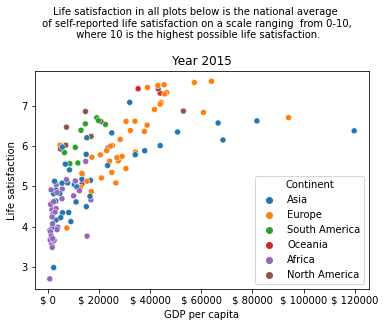

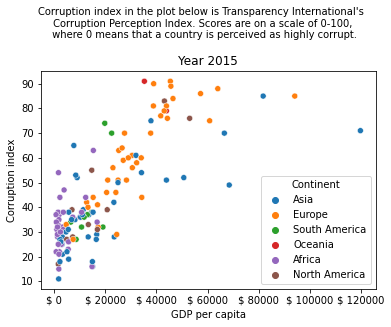

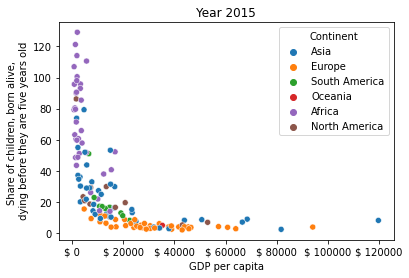

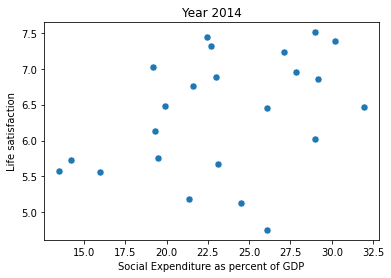

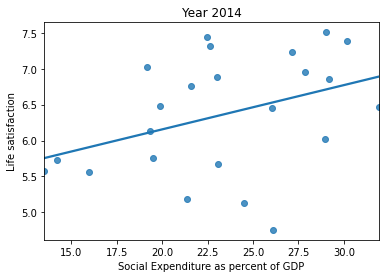

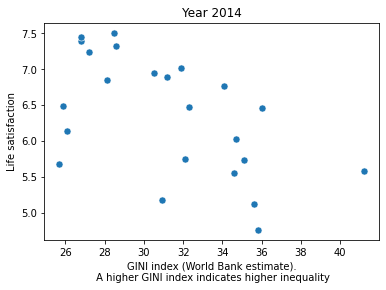

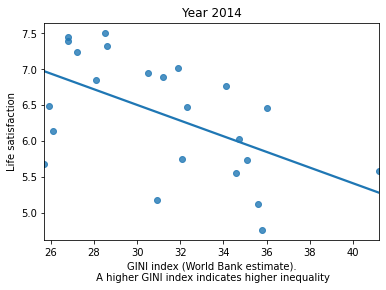

In [ ]:
# Read the files
happiness_data = pd.read_csv('gdp-vs-happiness.csv')
corruption_data = pd.read_csv('TI-corruption-perception-index.csv')
child_mortality_data = pd.read_csv('child-mortality-around-the-world.csv')
gini_data = pd.read_csv('economic-inequality-gini-index.csv')
oecd_social_spending_data = pd.read_csv('social-spending-oecd-longrun.csv')



# Rename Columns to more convinient names 
happiness_data.rename(columns = {happiness_data.columns[5] : 'Life Satisfaction'}, inplace = True)
happiness_data.rename(columns = {happiness_data.columns[6] : 'GDP per capita'}, inplace = True)
child_mortality_data.rename(columns = {child_mortality_data.columns[3] : 'Child mortality'}, inplace = True)


# Delete all rows lacking the information we are interestes in
happiness_data.dropna(subset=['Life Satisfaction', 'GDP per capita'], inplace = True)
corruption_data.dropna(subset=['Corruption Perception Index - Transparency International (2018)'], inplace = True)

# merge the data
combined_data = pd.merge(happiness_data, corruption_data, on=['Entity', 'Code', 'Year'])
combined_data = pd.merge(combined_data, child_mortality_data, on=['Entity', 'Code', 'Year'])

# pick data for year 2015
combined_data_2015 = combined_data[combined_data.Year == 2015]

# Scatter plot Life satisfaction and GDP per Capita
plot = sns.scatterplot(data=combined_data_2015, x="GDP per capita", y="Life Satisfaction", hue = "Continent")
plt.title("Year 2015")
plt.figtext(0.5, 1, "Life satisfaction in all plots below is the national average \n of self-reported life satisfaction on a scale ranging  from 0-10, \n where 10 is the highest possible life satisfaction.", wrap=True, horizontalalignment='center', fontsize=10)
formatter = ticker.FormatStrFormatter('$% 1.0f')
plot.xaxis.set_major_formatter(formatter)
plot.set(xlabel="GDP per capita", ylabel = "Life satisfaction")
plt.show()

# Scatter plot Corruption perception and GDP per capita
plot = sns.scatterplot(data=combined_data_2015, x="GDP per capita", y="Corruption Perception Index - Transparency International (2018)", hue = "Continent")
plt.title("Year 2015")
formatter = ticker.FormatStrFormatter('$% 1.0f')
plot.xaxis.set_major_formatter(formatter)
plt.figtext(0.5, 1, "Corruption index in the plot below is Transparency International's \n Corruption Perception Index. Scores are on a scale of 0-100, \n where 0 means that a country is perceived as highly corrupt.", wrap=True, horizontalalignment='center', fontsize=10)
plot.set(xlabel="GDP per capita", ylabel = "Corruption index")
plt.show()

# Scatter plot child mortality and GDP per capita
plot = sns.scatterplot(data=combined_data_2015, x="GDP per capita", y="Child mortality", hue = "Continent")
plt.title("Year 2015")
formatter = ticker.FormatStrFormatter('$% 1.0f')
plot.xaxis.set_major_formatter(formatter)
plot.set(xlabel="GDP per capita", ylabel = "Share of children, born alive, \n dying before they are five years old")
plt.show()

# Merge data to get a dataframe for OECD countries with GINI index and social spending
combined_data = pd.merge(combined_data, gini_data, on=['Entity', 'Code', 'Year'])
oecd_data = pd.merge(combined_data, oecd_social_spending_data, on=['Entity', 'Code', 'Year'])

# Create a dataframe for 2014
oecd_data_2014 = oecd_data[oecd_data.Year == 2014]

# rename a column for convinience
oecd_data_2014.rename(columns = {oecd_data_2014.columns[10] : 'Social Expenditure as percent of GDP'}, inplace = True)

# Change the type of the 'Social Expenditure as percent of GDP' column from object to float
oecd_data_2014['Social Expenditure as percent of GDP'] = oecd_data_2014['Social Expenditure as percent of GDP'].astype('float')

# Scatter plot social expenditure and life satisfaction for the oecd countries 
plot = sns.scatterplot(data=oecd_data_2014, x = "Social Expenditure as percent of GDP", y = "Life Satisfaction", s = 50)
plot.set(xlabel="Social Expenditure as percent of GDP", ylabel = "Life satisfaction")
plt.title("Year 2014")
plt.show()

# Make the same plot again with a regression line
plot = sns.regplot(data=oecd_data_2014, x = 'Social Expenditure as percent of GDP', y = 'Life Satisfaction', ci=None)
plot.set(xlabel="Social Expenditure as percent of GDP", ylabel = "Life satisfaction")
plt.title("Year 2014")
plt.show()

# Scatter plot the GINI index and life satisfaction for the oecd countries 
plot = sns.scatterplot(data=oecd_data_2014, x = 'GINI index (World Bank estimate)', y = 'Life Satisfaction', s = 50)
plot.set(xlabel="GINI index (World Bank estimate).\n A higher GINI index indicates higher inequality", ylabel = "Life satisfaction")
plt.title("Year 2014")
plt.show()

# Make the same plot again with a regression line
plot = sns.regplot(data=oecd_data_2014, x = 'GINI index (World Bank estimate)', y = 'Life Satisfaction', ci=None)
plot.set(xlabel="GINI index (World Bank estimate).\n A higher GINI index indicates higher inequality", ylabel = "Life satisfaction")
plt.title("Year 2014")
plt.show()


## 2 b
Even though we do not know if there is causation between GDP per capita and the measurements we chose it is reasonable to think there is. If we have a basic living standard most aspect of our life gets better. If people do not have to worry about getting food on the table they are more satisfied and if our economy is good the incentive for corruption is not as big.


We can also see that the correlations decreases when countries reaches a certain GDP per capita. This also seems pretty intuitive. Money makes life better to a certain degree and getting more after that does not matter significantly for our overall wellbeing.


If we look at our plots for the OECD countries, we can see there is a correlation between the social spending as part of GDP and perceived happiness and quite a strong correlation between equality and happiness within a society. We think both are interesting observations, but of course more in-depth analyses are needed to find the reasons these relationships.
